In [78]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [56]:
data = pd.read_csv('/Users/arun/Downloads/Loan_Data.csv')

In [57]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [58]:
data.shape

(614, 13)

In [59]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [60]:
data = data.dropna(axis=0)

In [61]:
data.duplicated().sum()

np.int64(0)

In [62]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [63]:
data.groupby(['Gender'])['ApplicantIncome'].agg(func= lambda x : np.mean(x))

Gender
Female    4968.593023
Male      5450.588832
Name: ApplicantIncome, dtype: float64

<Axes: ylabel='ApplicantIncome'>

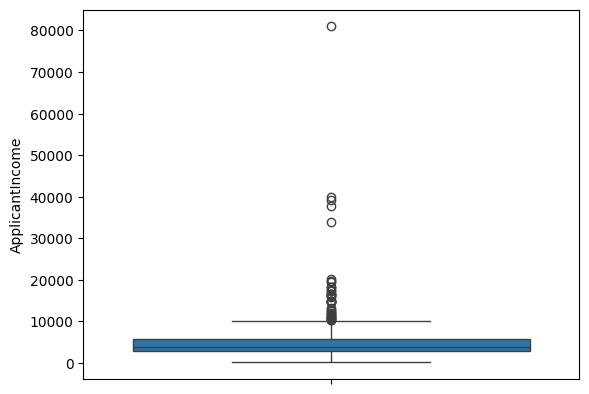

In [64]:
sns.boxplot(data['ApplicantIncome'])

<Axes: ylabel='CoapplicantIncome'>

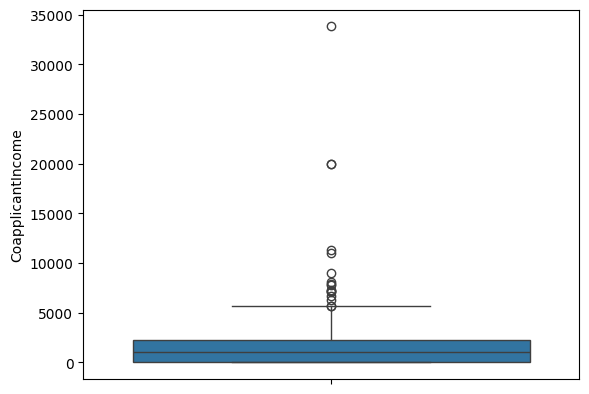

In [65]:
sns.boxplot(data['CoapplicantIncome'])

<Axes: ylabel='LoanAmount'>

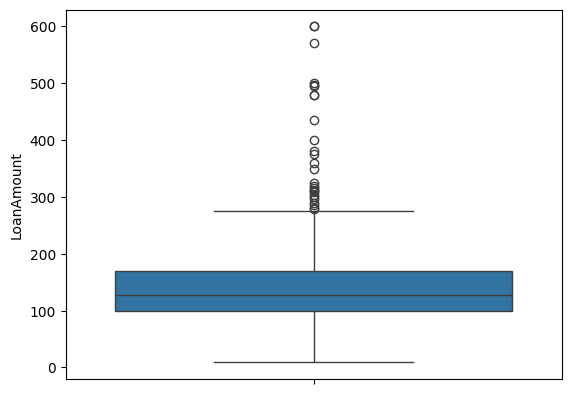

In [66]:
sns.boxplot(data['LoanAmount'])

In [67]:
percentile25 = data['ApplicantIncome'].quantile(0.25)
percentile75 = data['ApplicantIncome'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + iqr * 1.5
data.loc[data['ApplicantIncome'] > upper_limit,'ApplicantIncome'] = upper_limit

/var/folders/xz/_q1lhz9n52lb8rsrv2yy36dm0000gn/T/ipykernel_1277/3883605725.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10283.125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['ApplicantIncome'] > upper_limit,'ApplicantIncome'] = upper_limit


In [68]:
percentile25 = data['CoapplicantIncome'].quantile(0.25)
percentile75 = data['CoapplicantIncome'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + iqr * 1.5
data.loc[data['CoapplicantIncome'] > upper_limit,'CoapplicantIncome'] = upper_limit

In [69]:
percentile25 = data['LoanAmount'].quantile(0.25)
percentile75 = data['LoanAmount'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + iqr * 1.5
data.loc[data['LoanAmount'] > upper_limit,'LoanAmount'] = upper_limit

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

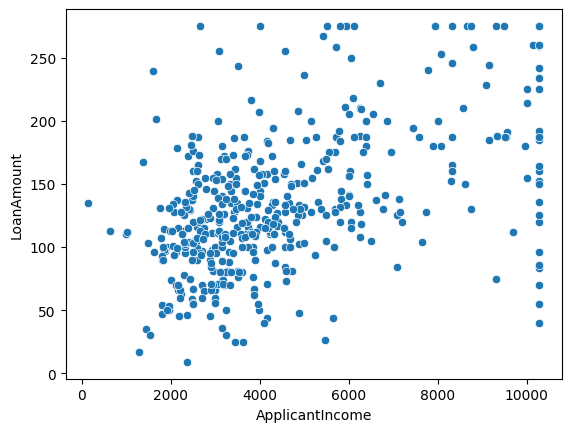

In [70]:
sns.scatterplot(data=data, x = 'ApplicantIncome', y = 'LoanAmount')

In [71]:
data.corr(numeric_only=True)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.211292,0.572586,-0.016790,0.026767
CoapplicantIncome,-0.211292,1.000000,0.280956,-0.027764,-0.020994
LoanAmount,0.572586,0.280956,1.000000,0.075231,-0.025361
Loan_Amount_Term,-0.016790,-0.027764,0.075231,1.000000,0.032937
Credit_History,0.026767,-0.020994,-0.025361,0.032937,1.000000


<Axes: >

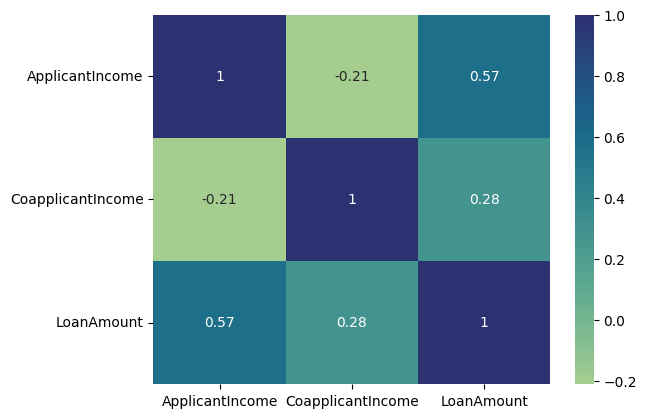

In [72]:
sns.heatmap(data=data[['ApplicantIncome','CoapplicantIncome','LoanAmount']].corr(numeric_only=True),annot=True,cmap='crest')

In [77]:
X = data[['ApplicantIncome','CoapplicantIncome','LoanAmount']]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = zip(X,vif)
print(list(vif))

[('ApplicantIncome', np.float64(7.716359536478198)), ('CoapplicantIncome', np.float64(2.3274942470427815)), ('LoanAmount', np.float64(10.896086058306762))]


In [80]:
data['Gender'].value_counts(normalize=True)

Gender
Male      0.820833
Female    0.179167
Name: proportion, dtype: float64

In [82]:
data_majority = data[data['Gender'] == 'Male']
data_minority = data[data['Gender'] == 'Female']

data_minority_upsampled = resample(data_minority, replace= True, n_samples= len(data_majority),random_state=0)

data_upsampled = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True)
data_upsampled['Gender'].value_counts(normalize=True)


Gender
Male      0.5
Female    0.5
Name: proportion, dtype: float64

In [91]:
y = data_upsampled['Loan_Status']

X = data_upsampled[['ApplicantIncome','CoapplicantIncome','Gender','Credit_History','Education']]
X.head()

,ApplicantIncome,CoapplicantIncome,Gender,Credit_History,Education
0,4583.0,1508.0,Male,1.0,Graduate
1,3000.0,0.0,Male,1.0,Graduate
2,2583.0,2358.0,Male,1.0,Not Graduate
3,6000.0,0.0,Male,1.0,Graduate
4,5417.0,4196.0,Male,1.0,Graduate


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3,random_state=0)

In [93]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((236, 5), (552, 5), (236,), (552,))

In [94]:
X_train_to_encode = X_train [['Gender','Education']]

In [96]:
X_encoder = OneHotEncoder(drop='first',sparse_output=False)
X_train_encoded = X_encoder.fit_transform(X_train_to_encode)
X_encoder.get_feature_names_out()

array(['Gender_Male', 'Education_Not Graduate'], dtype=object)

In [97]:
X_train_encoded

array([[1., 1.],
       [1., 1.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [0., 1.],
       [1., 1.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 1.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [1., 0.],
       [1., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.

In [98]:
X_train_encoded_df = pd.DataFrame(data=X_train_encoded, columns=X_encoder.get_feature_names_out())

In [99]:
X_train_encoded_df.head()

,Gender_Male,Education_Not Graduate
0,1.0,1.0
1,1.0,1.0
2,1.0,0.0
3,0.0,0.0
4,0.0,1.0


In [100]:
X_train_final = pd.concat([X_train.drop(columns=["Gender", "Education"]).reset_index(drop=True), X_train_encoded_df], axis=1)
X_train_final

,ApplicantIncome,CoapplicantIncome,Credit_History,Gender_Male,Education_Not Graduate
0,2583.0,2167.0,1.0,1.0,1.0
1,2239.0,2524.0,1.0,1.0,1.0
2,2297.0,1522.0,1.0,1.0,0.0
3,2900.0,0.0,1.0,0.0,0.0
4,2213.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...
231,5000.0,0.0,1.0,0.0,0.0
232,9508.0,0.0,1.0,1.0,0.0
233,5000.0,0.0,1.0,0.0,0.0
234,3244.0,0.0,1.0,0.0,0.0


In [101]:
y_encoder = OneHotEncoder(drop='first', sparse_output=False)
y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_train_final

array([1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 1.

In [102]:
log_clf = LogisticRegression(random_state=0, max_iter=800).fit(X_train_final, y_train_final)

In [103]:
X_test_to_encode = X_test[['Gender','Education']]
X_test_encoded = X_encoder.transform(X_test_to_encode)
X_test_encoded_df = pd.DataFrame(data=X_test_encoded,columns=X_encoder.get_feature_names_out())


In [104]:
X_test_final = pd.concat([X_test.drop(columns=["Gender", "Education"]).reset_index(drop=True), X_test_encoded_df], axis=1)

In [105]:
y_pred = log_clf.predict(X_test_final)

In [109]:
y_test_final = y_encoder.transform(y_test.values.reshape(-1, 1)).ravel()

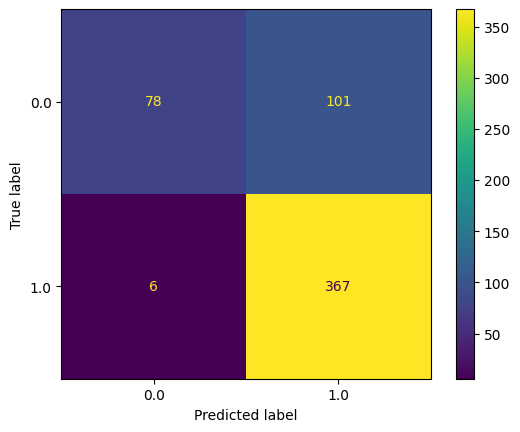

In [110]:
log_cm = confusion_matrix(y_test_final,y_pred,labels=log_clf.classes_)
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,display_labels=log_clf.classes_)
log_disp.plot()
plt.show()

In [111]:
target_labels = ["verified", "not verified"]
print(classification_report(y_test_final, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.93      0.44      0.59       179
not verified       0.78      0.98      0.87       373

    accuracy                           0.81       552
   macro avg       0.86      0.71      0.73       552
weighted avg       0.83      0.81      0.78       552



In [112]:
pd.DataFrame(data={"Feature Name":log_clf.feature_names_in_, "Model Coefficient":log_clf.coef_[0]})

,Feature Name,Model Coefficient
0,ApplicantIncome,0.000013
1,CoapplicantIncome,0.000081
2,Credit_History,2.797003
3,Gender_Male,0.160053
4,Education_Not Graduate,-0.262346
